In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("/kaggle/input/clothing-retail-sales/dataset_6_Clothing Retail Sales.csv")
# output=[]
# output.append()
# output.append("Analysis the ")
print(df.head())

         Date   Product Region Customer_Type  Quantity   Price  Discount  \
0  2024-05-06  T-shirts  North       Regular        70  181.50      0.24   
1  2024-07-04   Dresses  South           VIP        65  195.71      0.14   
2  2024-11-17   Dresses  North       Regular         6  189.52      0.03   
3  2024-06-05  T-shirts  South           VIP        79  149.36      0.29   
4  2024-06-01   Dresses   West           VIP        39  182.88      0.00   

    Revenue  
0   9655.80  
1  10940.19  
2   1103.01  
3   8377.60  
4   7132.32  


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [48]:
print(df.describe())

          Quantity        Price     Discount       Revenue
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     50.760000   103.506720     0.143950   4514.262680
std      28.280987    54.922262     0.086898   3744.138689
min       1.000000     5.960000     0.000000     20.140000
25%      27.000000    58.680000     0.070000   1421.862500
50%      50.000000   103.710000     0.140000   3546.050000
75%      74.000000   149.952500     0.220000   6676.280000
max     100.000000   199.870000     0.300000  18206.810000


In [50]:
print(df.describe())
# output.append(f'Summary Statistice:\n{df.describe()}\n')

          Quantity        Price     Discount       Revenue
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     50.760000   103.506720     0.143950   4514.262680
std      28.280987    54.922262     0.086898   3744.138689
min       1.000000     5.960000     0.000000     20.140000
25%      27.000000    58.680000     0.070000   1421.862500
50%      50.000000   103.710000     0.140000   3546.050000
75%      74.000000   149.952500     0.220000   6676.280000
max     100.000000   199.870000     0.300000  18206.810000


In [56]:

missing_values = df.isnull().sum()
print(missing_values)
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [71]:
duplicates = df.duplicated().sum()
print(duplicates)
df.drop_duplicates(inplace=True)
df

0


,Date,Product,Region,Customer_Type,Quantity,Price,Discount,Revenue
0,2024-05-06,T-shirts,North,Regular,70,181.50,0.24,9655.80
1,2024-07-04,Dresses,South,VIP,65,195.71,0.14,10940.19
2,2024-11-17,Dresses,North,Regular,6,189.52,0.03,1103.01
3,2024-06-05,T-shirts,South,VIP,79,149.36,0.29,8377.60
4,2024-06-01,Dresses,West,VIP,39,182.88,0.00,7132.32
...,...,...,...,...,...,...,...,...
995,2024-03-19,T-shirts,South,VIP,19,86.76,0.16,1384.69
996,2024-05-31,Jeans,West,VIP,15,64.89,0.18,798.15
997,2024-04-10,Dresses,East,VIP,99,191.57,0.04,18206.81
998,2024-08-23,Accessories,East,Regular,17,156.23,0.20,2124.73


In [78]:
total_revenue = df['Price'].sum()
# output.append(f'Total Revenue: tk{total_revenue}\n')
print(f'Total Revenue:  tk{total_revenue}')

Total Revenue:  tk103506.72


In [81]:
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
# output.append("Average price per customer type:\n")
# output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
Regular    103.183522
VIP        103.801491
Name: Price, dtype: float64


In [83]:
total_services_by_product = df ['Product'].value_counts()
# output.append("Total services provided by product:\n")
# output.append(f"{total_services_by_product}\n")
print(total_services_by_product)

Product
Dresses        262
Accessories    260
T-shirts       251
Jeans          227
Name: count, dtype: int64


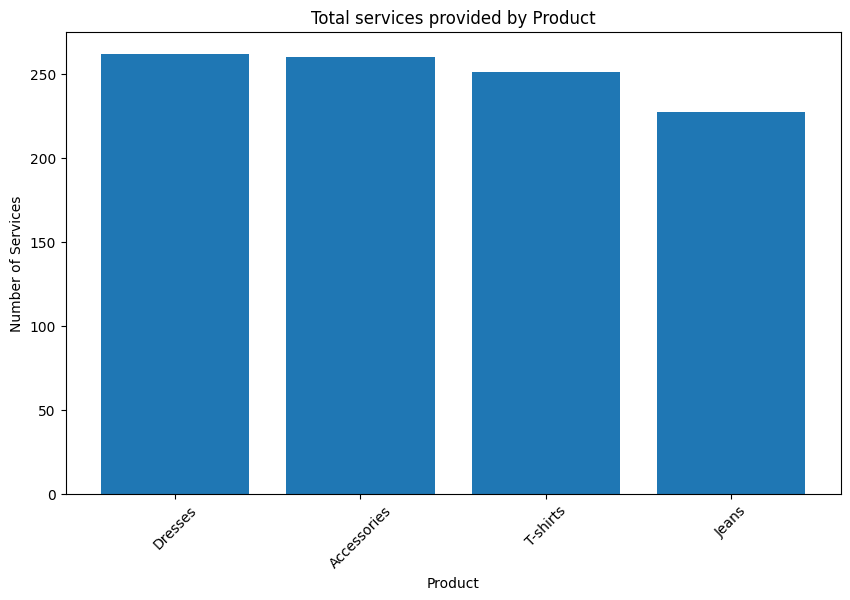

In [86]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_product.index, total_services_by_product.values)
plt.title("Total services provided by Product")
plt.xlabel('Product')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_product.png')
plt.show()

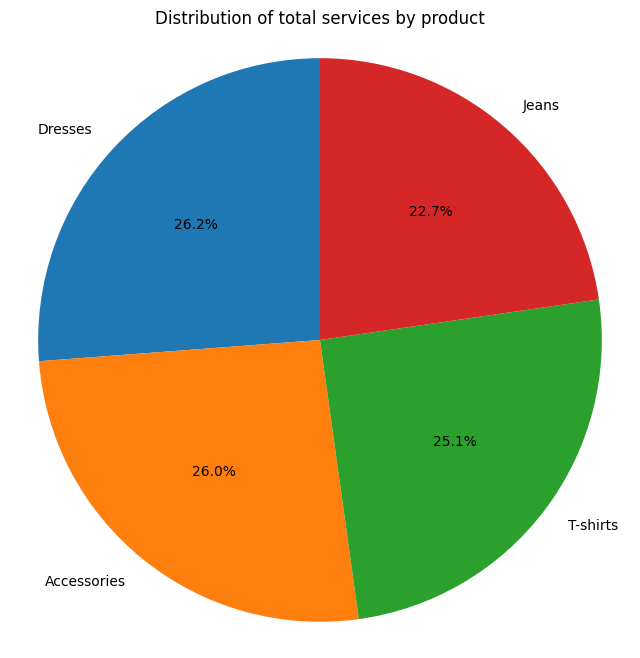

In [87]:
plt.figure(figsize=(8,8))
plt.pie(total_services_by_product, labels= total_services_by_product.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of total services by product')
plt.axis('equal')
plt.savefig('services_distribution_by_product.png')
plt.show()